# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# API call documentation from openweathermap for 'by city name'
url = "http://api.openweathermap.org/data/2.5/weather?"

# variable lists to fill in for loop for df later
city_name = []
city_lat = []
city_lon = []
city_max_temp = []
city_hum = []
city_cloud = []
city_wind = []
city_cntry = []
city_date = []

print(f"Beginning Data Retrieval")
print("--------------------------")

count=1

for city in cities:
    try:
        # build query url inputing current city, API key, and unit of measure to return
        query_url = f'{url}q={city}&appid={weather_api_key}&units=imperial'
        weather_response = requests.get(query_url).json()
        print(f"Processing record {count} | City Name: {city}")

        # gather data from cities and store in above lists 
        city_name.append(weather_response['name'])
        city_lat.append(weather_response['coord']['lat'])
        city_lon.append(weather_response['coord']['lon'])
        city_max_temp.append(weather_response['main']['temp_max'])
        city_hum.append(weather_response['main']['humidity'])
        city_cloud.append(weather_response['clouds']['all'])
        city_wind.append(weather_response['wind']['speed'])
        city_cntry.append(weather_response['sys']['country'])
        city_date.append(weather_response['dt'])

    except:
        print(f"Skipping, NOT FOUND: Record {count} | City Name: {city}")
        pass
    count = count + 1


print("Data Retrieval Complete")

Beginning Data Retrieval
--------------------------
Processing record 1 | City Name: bandarbeyla
Processing record 2 | City Name: illoqqortoormiut
Skipping, NOT FOUND: Record 2 | City Name: illoqqortoormiut
Processing record 3 | City Name: port alfred
Processing record 4 | City Name: san quintin
Processing record 5 | City Name: itarema
Processing record 6 | City Name: fukue
Processing record 7 | City Name: ketchikan
Processing record 8 | City Name: taolanaro
Skipping, NOT FOUND: Record 8 | City Name: taolanaro
Processing record 9 | City Name: qaanaaq
Processing record 10 | City Name: puerto baquerizo moreno
Processing record 11 | City Name: carnarvon
Processing record 12 | City Name: mopipi
Processing record 13 | City Name: sri aman
Processing record 14 | City Name: khatanga
Processing record 15 | City Name: cap malheureux
Processing record 16 | City Name: cape town
Processing record 17 | City Name: kaitangata
Processing record 18 | City Name: coyaima
Processing record 19 | City Name: 

Processing record 170 | City Name: porto novo
Processing record 171 | City Name: hasaki
Processing record 172 | City Name: khonuu
Skipping, NOT FOUND: Record 172 | City Name: khonuu
Processing record 173 | City Name: villa del rosario
Processing record 174 | City Name: kumluca
Processing record 175 | City Name: georgetown
Processing record 176 | City Name: daxian
Skipping, NOT FOUND: Record 176 | City Name: daxian
Processing record 177 | City Name: maningrida
Processing record 178 | City Name: bud
Processing record 179 | City Name: alice springs
Processing record 180 | City Name: khowai
Processing record 181 | City Name: touros
Processing record 182 | City Name: karratha
Processing record 183 | City Name: berdsk
Processing record 184 | City Name: biak
Processing record 185 | City Name: sakakah
Processing record 186 | City Name: ndele
Processing record 187 | City Name: nizhneyansk
Skipping, NOT FOUND: Record 187 | City Name: nizhneyansk
Processing record 188 | City Name: mpika
Processin

Processing record 338 | City Name: laguna
Processing record 339 | City Name: west wendover
Processing record 340 | City Name: san ramon de la nueva oran
Processing record 341 | City Name: avera
Processing record 342 | City Name: labutta
Skipping, NOT FOUND: Record 342 | City Name: labutta
Processing record 343 | City Name: muros
Processing record 344 | City Name: sorland
Processing record 345 | City Name: kadykchan
Skipping, NOT FOUND: Record 345 | City Name: kadykchan
Processing record 346 | City Name: anadyr
Processing record 347 | City Name: tres arroyos
Processing record 348 | City Name: talnakh
Processing record 349 | City Name: mayumba
Processing record 350 | City Name: uwayl
Skipping, NOT FOUND: Record 350 | City Name: uwayl
Processing record 351 | City Name: amarpur
Processing record 352 | City Name: liku
Processing record 353 | City Name: pierre
Processing record 354 | City Name: buraydah
Processing record 355 | City Name: necochea
Processing record 356 | City Name: khorramsha

Processing record 499 | City Name: mairipora
Processing record 500 | City Name: weiser
Processing record 501 | City Name: sechura
Processing record 502 | City Name: novokizhinginsk
Processing record 503 | City Name: limpapa
Processing record 504 | City Name: bhikangaon
Processing record 505 | City Name: anda
Processing record 506 | City Name: bukachacha
Processing record 507 | City Name: sao miguel do araguaia
Processing record 508 | City Name: yarada
Processing record 509 | City Name: great falls
Processing record 510 | City Name: amapa
Processing record 511 | City Name: alofi
Processing record 512 | City Name: etchojoa
Processing record 513 | City Name: rocha
Processing record 514 | City Name: sansai
Skipping, NOT FOUND: Record 514 | City Name: sansai
Processing record 515 | City Name: acurenam
Processing record 516 | City Name: barcelona
Processing record 517 | City Name: victoria
Processing record 518 | City Name: ossora
Processing record 519 | City Name: kuche
Skipping, NOT FOUND:

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create dataframe from lists formed by above loop
city_data_df = pd.DataFrame({"City Name": city_name,
                          "Latitude":city_lat,
                          "Longitude":city_lon,
                          "Max Temp. (F)":city_max_temp,
                          "Humidity (%)":city_hum,
                          "Cloudiness (%)":city_cloud,
                          "Wind Speed (mph)":city_wind,
                          "Country":city_cntry,
                          "Date (UTC)":city_date})
city_data_df.to_csv(output_data_file, encoding="utf-8", index=False)
city_data_df.head(25)

,City Name,Latitude,Longitude,Max Temp. (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date (UTC)
0,Bandarbeyla,9.4942,50.8122,72.14,72,13,14.07,SO,1612306357
1,Port Alfred,-33.5906,26.8910,66.00,91,13,9.24,ZA,1612306357
2,San Quintín,30.4833,-115.9500,65.62,61,87,15.08,MX,1612306357
3,Itarema,-2.9248,-39.9167,78.84,77,0,12.41,BR,1612306357
4,Fukuechō,32.6881,128.8419,42.98,66,100,18.63,JP,1612306358
5,Ketchikan,55.3422,-131.6461,42.80,75,1,5.37,US,1612306358
6,Qaanaaq,77.4840,-69.3632,-12.01,84,100,0.74,GL,1612306358
7,Puerto Baquerizo Moreno,-0.9000,-89.6000,82.40,78,75,17.27,EC,1612306359
8,Carnarvon,-24.8667,113.6333,73.40,100,40,20.71,AU,1612306359
9,Mopipi,-21.1833,24.8833,70.75,81,100,17.94,BW,1612306359


## Inspect the data and remove the cities where the humidity > 100%.
----

In [5]:
# remove all cities with a humidity marked at higher than 100%
clean_city_data = city_data_df.loc[city_data_df["Humidity (%)"] <= 100]
clean_city_data.head(25)

,City Name,Latitude,Longitude,Max Temp. (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date (UTC)
0,Bandarbeyla,9.4942,50.8122,72.14,72,13,14.07,SO,1612306357
1,Port Alfred,-33.5906,26.8910,66.00,91,13,9.24,ZA,1612306357
2,San Quintín,30.4833,-115.9500,65.62,61,87,15.08,MX,1612306357
3,Itarema,-2.9248,-39.9167,78.84,77,0,12.41,BR,1612306357
4,Fukuechō,32.6881,128.8419,42.98,66,100,18.63,JP,1612306358
5,Ketchikan,55.3422,-131.6461,42.80,75,1,5.37,US,1612306358
6,Qaanaaq,77.4840,-69.3632,-12.01,84,100,0.74,GL,1612306358
7,Puerto Baquerizo Moreno,-0.9000,-89.6000,82.40,78,75,17.27,EC,1612306359
8,Carnarvon,-24.8667,113.6333,73.40,100,40,20.71,AU,1612306359
9,Mopipi,-21.1833,24.8833,70.75,81,100,17.94,BW,1612306359


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

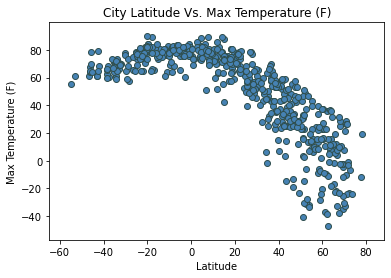

In [6]:
plt.scatter(clean_city_data["Latitude"],clean_city_data["Max Temp. (F)"], marker="o", facecolors="steelblue", edgecolors="darkslategrey")
plt.title("City Latitude Vs. Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(min(clean_city_data["Latitude"])-10, max(clean_city_data["Latitude"])+10)
plt.ylim(min(clean_city_data["Max Temp. (F)"])-10, max(clean_city_data["Max Temp. (F)"])+10)
plt.show()

## Latitude vs. Humidity Plot

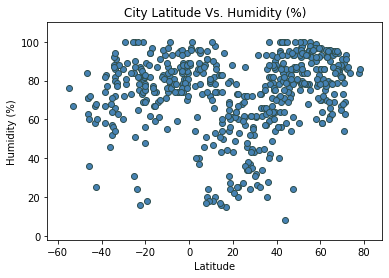

In [7]:
plt.scatter(clean_city_data["Latitude"],clean_city_data["Humidity (%)"], marker="o", facecolors="steelblue", edgecolors="darkslategrey")
plt.title("City Latitude Vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(min(clean_city_data["Latitude"])-10, max(clean_city_data["Latitude"])+10)
plt.ylim(min(clean_city_data["Humidity (%)"])-10, max(clean_city_data["Humidity (%)"])+10)
plt.show()

## Latitude vs. Cloudiness Plot

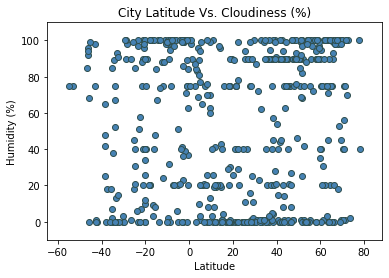

In [8]:
plt.scatter(clean_city_data["Latitude"],clean_city_data["Cloudiness (%)"], marker="o", facecolors="steelblue", edgecolors="darkslategrey")
plt.title("City Latitude Vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(min(clean_city_data["Latitude"])-10, max(clean_city_data["Latitude"])+10)
plt.ylim(min(clean_city_data["Cloudiness (%)"])-10, max(clean_city_data["Cloudiness (%)"])+10)
plt.show()

## Latitude vs. Wind Speed Plot

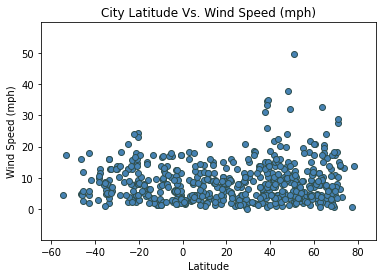

In [9]:
plt.scatter(clean_city_data["Latitude"],clean_city_data["Wind Speed (mph)"], marker="o", facecolors="steelblue", edgecolors="darkslategrey")
plt.title("City Latitude Vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(min(clean_city_data["Latitude"])-10, max(clean_city_data["Latitude"])+10)
plt.ylim(min(clean_city_data["Wind Speed (mph)"])-10, max(clean_city_data["Wind Speed (mph)"])+10)
plt.show()

## Linear Regression

In [10]:
# dataframe for referencing northern and southern hemisphere
no_hem = clean_city_data.loc[clean_city_data["Latitude"]>= 0]
so_hem = clean_city_data.loc[clean_city_data["Latitude"]< 0]

#x-axis variable
nx_values = no_hem["Latitude"]
sx_values = so_hem["Latitude"]

### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-value: -0.84
r-squared: 0.71


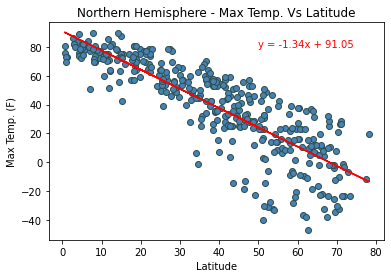

In [11]:
# y-axis variable
nty_values = no_hem["Max Temp. (F)"]

#correlation:
(slope, intercept, rvalue, pvalue, stderr) = linregress(nx_values, nty_values)
regress_values = nx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#print statements and plotting
# print(correlation)
print(f"r-value: {round(rvalue,2)}")
print(f"r-squared: {round(rvalue**2,2)}")
plt.scatter(nx_values, nty_values, marker="o", facecolors="steelblue", edgecolors="darkslategrey")
plt.plot(nx_values, regress_values, "r-")
plt.annotate(line_eq, (50,80), fontsize=10, color="red")
plt.xlim = (min(nx_values)-10, max(nx_values)+10)
plt.ylim = (min(nty_values)-10, max(nty_values)+10)
plt.xlabel("Latitude")
plt.ylabel("Max Temp. (F)")
plt.title("Northern Hemisphere - Max Temp. Vs Latitude")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-value: 0.59
r-squared: 0.35


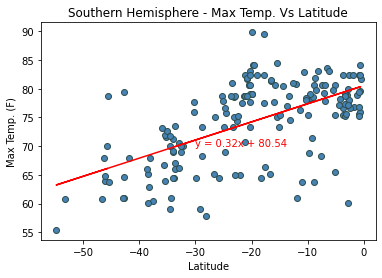

In [20]:
# y-axis variable
sty_values = so_hem["Max Temp. (F)"]

#correlation:
(slope, intercept, rvalue, pvalue, stderr) = linregress(sx_values, sty_values)
regress_values = sx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#print statements and plotting
# print(correlation)
print(f"r-value: {round(rvalue,2)}")
print(f"r-squared: {round(rvalue**2,2)}")
plt.scatter(sx_values, sty_values, marker="o", facecolors="steelblue", edgecolors="darkslategrey")
plt.plot(sx_values, regress_values, "r-")
plt.annotate(line_eq, (-30,70), fontsize=10, color="red")
plt.xlim = (min(sx_values)-10, max(sx_values)+10)
plt.ylim = (min(sty_values)-10, max(sty_values)+10)
plt.xlabel("Latitude")
plt.ylabel("Max Temp. (F)")
plt.title("Southern Hemisphere - Max Temp. Vs Latitude")
plt.show()

The linear regressions provided in the two plots above are showing the impact that latitude has on a city's max temperature. There appears to be a strong correlation betwen the two variables. In other words, a city's closeness to the equator strongly impacts the max temperature of that city.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-value: 0.36
r-squared: 0.13


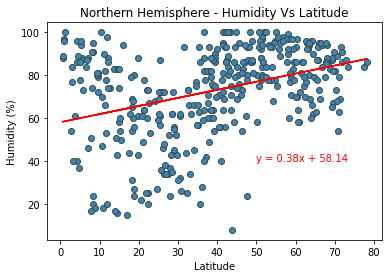

In [13]:
# y-axis variable
nhy_values = no_hem["Humidity (%)"]

#correlation:
(slope, intercept, rvalue, pvalue, stderr) = linregress(nx_values, nhy_values)
regress_values = nx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#print statements and plotting
# print(correlation)
print(f"r-value: {round(rvalue,2)}")
print(f"r-squared: {round(rvalue**2,2)}")
plt.scatter(nx_values, nhy_values, marker="o", facecolors="steelblue", edgecolors="darkslategrey")
plt.plot(nx_values, regress_values, "r-")
plt.annotate(line_eq, (50,40), fontsize=10, color="red")
plt.xlim = (min(nx_values)-10, max(nx_values)+10)
plt.ylim = (min(nhy_values)-10, max(nhy_values)+10)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity Vs Latitude")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-value: 0.32
r-squared: 0.1


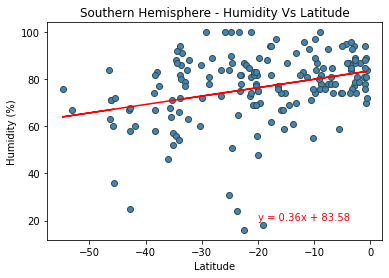

In [14]:
# y-axis variable
shy_values = so_hem["Humidity (%)"]

#correlation:
(slope, intercept, rvalue, pvalue, stderr) = linregress(sx_values, shy_values)
regress_values = sx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#print statements and plotting
# print(correlation)
print(f"r-value: {round(rvalue,2)}")
print(f"r-squared: {round(rvalue**2,2)}")
plt.scatter(sx_values, shy_values, marker="o", facecolors="steelblue", edgecolors="darkslategrey")
plt.plot(sx_values, regress_values, "r-")
plt.annotate(line_eq, (-20,20), fontsize=10, color="red")
plt.xlim = (min(sx_values)-10, max(sx_values)+10)
plt.ylim = (min(shy_values)-10, max(shy_values)+10)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity Vs Latitude")
plt.show()

The linear regressions provided in the two plots above are showing the impact that latitude has on a city's humidity. There does not appear to be a strong correlation betwen the two variables.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-value: 0.27
r-squared: 0.07


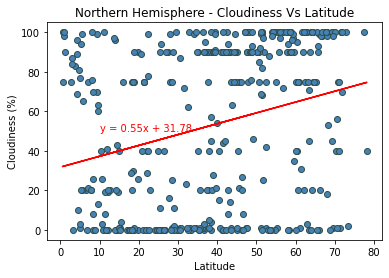

In [15]:
# y-axis variable
ncy_values = no_hem["Cloudiness (%)"]

#correlation:
(slope, intercept, rvalue, pvalue, stderr) = linregress(nx_values, ncy_values)
regress_values = nx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#print statements and plotting
# print(correlation)
print(f"r-value: {round(rvalue,2)}")
print(f"r-squared: {round(rvalue**2,2)}")
plt.scatter(nx_values, ncy_values, marker="o", facecolors="steelblue", edgecolors="darkslategrey")
plt.plot(nx_values, regress_values, "r-")
plt.annotate(line_eq, (10,50), fontsize=10, color="red")
plt.xlim = (min(nx_values)-10, max(nx_values)+10)
plt.ylim = (min(ncy_values)-10, max(ncy_values)+10)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness Vs Latitude")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-value: 0.22
r-squared: 0.05


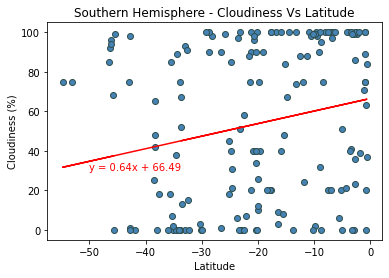

In [16]:
# y-axis variable
scy_values = so_hem["Cloudiness (%)"]

#correlation:
(slope, intercept, rvalue, pvalue, stderr) = linregress(sx_values, scy_values)
regress_values = sx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#print statements and plotting
# print(correlation)
print(f"r-value: {round(rvalue,2)}")
print(f"r-squared: {round(rvalue**2,2)}")
plt.scatter(sx_values, scy_values, marker="o", facecolors="steelblue", edgecolors="darkslategrey")
plt.plot(sx_values, regress_values, "r-")
plt.annotate(line_eq, (-50,30), fontsize=10, color="red")
plt.xlim = (min(sx_values)-10, max(sx_values)+10)
plt.ylim = (min(scy_values)-10, max(scy_values)+10)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness Vs Latitude")
plt.show()

The linear regressions provided in the two plots above are showing the impact that latitude has on a city's cloudiness. There does not appear to be a strong correlation betwen the two variables, however cities in the northern hemisphere do seem impacted more than the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-value: 0.149
r-squared: 0.022


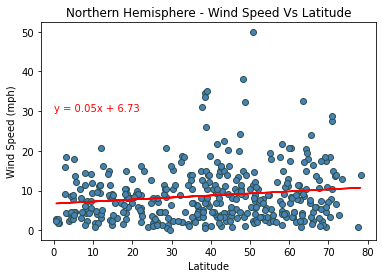

In [17]:
# y-axis variable
nwy_values = no_hem["Wind Speed (mph)"]

#correlation:
(slope, intercept, rvalue, pvalue, stderr) = linregress(nx_values, nwy_values)
regress_values = nx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#print statements and plotting
# print(correlation)
print(f"r-value: {round(rvalue,3)}")
print(f"r-squared: {round(rvalue**2,3)}")
plt.scatter(nx_values, nwy_values, marker="o", facecolors="steelblue", edgecolors="darkslategrey")
plt.plot(nx_values, regress_values, "r-")
plt.annotate(line_eq, (0,30), fontsize=10, color="red")
plt.xlim = (min(nx_values)-10, max(nx_values)+10)
plt.ylim = (min(nwy_values)-10, max(nwy_values)+10)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed Vs Latitude")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-value: -0.082
r-squared: 0.007


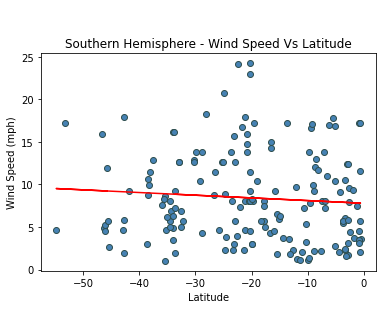

In [18]:
# y-axis variable
swy_values = so_hem["Wind Speed (mph)"]

#correlation:
(slope, intercept, rvalue, pvalue, stderr) = linregress(sx_values, swy_values)
regress_values = sx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#print statements and plotting
# print(correlation)
print(f"r-value: {round(rvalue,3)}")
print(f"r-squared: {round(rvalue**2,3)}")
plt.scatter(sx_values, swy_values, marker="o", facecolors="steelblue", edgecolors="darkslategrey")
plt.plot(sx_values, regress_values, "r-")
plt.annotate(line_eq, (-50,30), fontsize=10, color="red")
plt.xlim = (min(sx_values)-10, max(sx_values)+10)
plt.ylim = (min(swy_values)-10, max(swy_values)+10)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed Vs Latitude")
plt.show()

The linear regressions provided in the two plots above are showing the impact that latitude has on a city's wind speed. There does not appear to be a correlation betwen the two variables in either hemisphere.